#Lab 11-0 RNN Intro

RNN 
- For sequential Data
- such as word, sentence, time series, ...

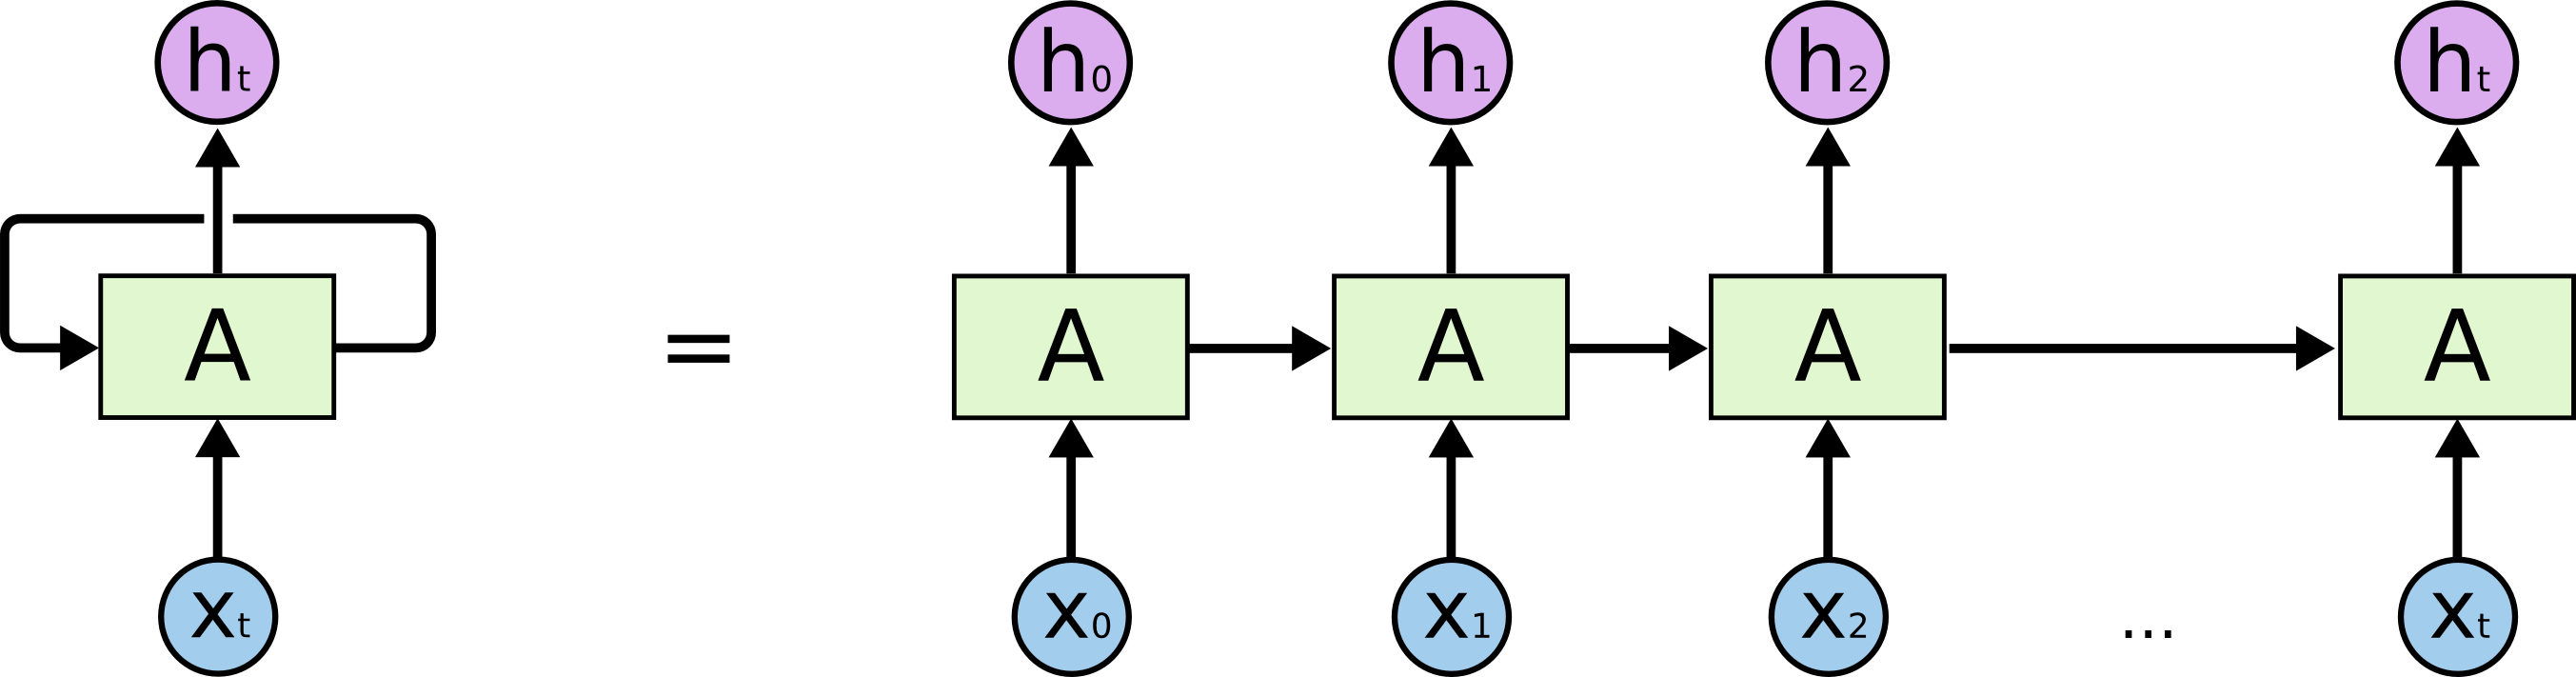

In A, 
$$h_t = f(h_{t-1}, x_t) $$
For example, 
$$h_t = tanh(W_h h_{t-1} + W_x x_t) $$

#Lab11-1 RNN basics

In [12]:
import torch
import numpy as np
import torch.optim as optim
import torch.nn as nn

In [2]:
input_size = 4
hidden_size = 2

# 1 - hot encoding
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

input_data_np = np.array([[h, e, l, l, o], 
                          [e, o, l, l, l],
                          [l, l, e, e, l]], dtype = np.float32)

# transform as torch tensor
input_data = torch.Tensor(input_data_np)

rnn = torch.nn.RNN(input_size, hidden_size)

outputs , _status = rnn(input_data)

#Lab11-2 RNN hihello and charseq

In [14]:
# one-hot encoding 
char_set = ['h', 'i', 'e', 'l', 'o']

# hyperparameters
input_size = len(char_set)
hidden_size = len(char_set)
learning_rate = 0.1

# data setting
x_data = [[0, 1, 0, 2, 3, 3]]
x_one_hot = [[[1, 0, 0, 0, 0], # h
              [0, 1, 0, 0, 0], # i
              [1, 0, 0, 0, 0], # h
              [0, 0, 1, 0, 0], # e
              [0, 0, 0, 1, 0], # l
              [0, 0, 0, 1, 0]]]# l
              # 다음 문자를 예측하는 모델이라서 'o'를 뺀 hihell을 input으로 사용
y_data = [[1, 0, 2, 3, 3, 4]] # hihello

In [15]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [16]:
# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size, batch_first = True) # batch_first : output order를 (B, S, F)로 보장해준다

# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

# start training
for i in range(100):
  optimizer.zero_grad()
  outputs, _status = rnn(X)
  loss = criterion(outputs.view(-1, input_size), Y.view(-1))
  loss.backward()
  optimizer.step()
  result = outputs.data.numpy().argmax(axis = 2)
  result_str = ''.join([char_set[c] for c in np.squeeze(result)])
  print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.7121940851211548 prediction:  [[3 3 4 0 4 2]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  llohoe
1 loss:  1.5957430601119995 prediction:  [[2 3 2 2 2 2]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  eleeee
2 loss:  1.4435769319534302 prediction:  [[2 3 2 3 3 2]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  elelle
3 loss:  1.285881519317627 prediction:  [[2 3 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  elelll
4 loss:  1.177424669265747 prediction:  [[1 3 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ilelll
5 loss:  1.0982680320739746 prediction:  [[1 3 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ilelll
6 loss:  1.033416509628296 prediction:  [[1 3 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ilelll
7 loss:  0.9748229384422302 prediction:  [[1 0 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihelll
8 loss:  0.9224035739898682 prediction:  [[1 0 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihelll
9 lo

## Charseq

In [17]:
sample = " if you want you"
# make dictionary
char_set = list(set(sample))
char_dic = {c: i for i, c in enumerate(char_set)}

# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
learning_rate = 0.1

# data setting
sample_idx = [char_dic[c] for c in sample]
x_data = [sample_idx[:-1]]
x_one_hot = [np.eye(dic_size)[x] for x in x_data]
y_data = [sample_idx[1:]]

# transfrom as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)


In [18]:
print(x_data, y_data)
print(X, Y)

[[3, 7, 6, 3, 9, 4, 5, 3, 2, 8, 0, 1, 3, 9, 4]] [[7, 6, 3, 9, 4, 5, 3, 2, 8, 0, 1, 3, 9, 4, 5]]
tensor([[[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]]) tensor([[7, 6, 3, 9, 4, 5, 3, 2, 8, 0, 1, 3, 9, 4, 5]])


In [19]:
# declare RNN
rnn = torch.nn.RNN(dic_size, hidden_size, batch_first = True)

# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

In [20]:
# start training
for i in range(50):
  optimizer.zero_grad() # 꼭 해주어야 함! 매 for문 마다 새로 gradient 구할 수 있음
  outputs, _status = rnn(X)
  loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
  loss.backward()
  optimizer.step()

  result = outputs.data.numpy().argmax(axis = 2)
  result_str = ''.join([char_set[c] for c in np.squeeze(result)])
  print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  2.306694746017456 prediction:  [[7 7 5 7 5 5 5 7 7 7 0 5 7 5 5]] true Y:  [[7, 6, 3, 9, 4, 5, 3, 2, 8, 0, 1, 3, 9, 4, 5]] prediction str:  iiuiuuuiiinuiuu
1 loss:  2.1279876232147217 prediction:  [[7 7 7 7 3 2 3 7 7 7 7 7 7 3 2]] true Y:  [[7, 6, 3, 9, 4, 5, 3, 2, 8, 0, 1, 3, 9, 4, 5]] prediction str:  iiii w iiiiii w
2 loss:  1.856385588645935 prediction:  [[7 3 7 9 3 5 3 2 4 4 7 3 9 3 2]] true Y:  [[7, 6, 3, 9, 4, 5, 3, 2, 8, 0, 1, 3, 9, 4, 5]] prediction str:  i iy u wooi y w
3 loss:  1.6613413095474243 prediction:  [[9 3 3 9 4 5 3 2 9 4 7 3 9 4 5]] true Y:  [[7, 6, 3, 9, 4, 5, 3, 2, 8, 0, 1, 3, 9, 4, 5]] prediction str:  y  you wyoi you
4 loss:  1.52445387840271 prediction:  [[9 6 5 9 4 5 3 2 9 6 1 3 9 4 5]] true Y:  [[7, 6, 3, 9, 4, 5, 3, 2, 8, 0, 1, 3, 9, 4, 5]] prediction str:  yfuyou wyft you
5 loss:  1.4168245792388916 prediction:  [[9 6 5 9 4 5 3 2 9 6 1 3 9 4 5]] true Y:  [[7, 6, 3, 9, 4, 5, 3, 2, 8, 0, 1, 3, 9, 4, 5]] prediction str:  yfuyou wyft you
6 loss:  1.307

#Lab11-3 RNN Long Sequence

In [21]:
torch.manual_seed(0)

## Long sentence에서 sequence dataset 만들기

In [22]:
sentence = ("if you want to build a ship, don't drum up people together to"
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [24]:
# make dictionary 
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

In [25]:
# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10
learning_rate = 0.1

In [26]:
# data setting
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i:i + sequence_length]
  y_str = sentence[i + 1: i + sequence_length + 1]
  print(i, x_str, '->', y_str)
  x_data.append([char_dic[c] for c in x_str]) # x str to index
  y_data.append([char_dic[c] for c in y_str]) # y str to index

x_one_hot = [np.eye(dic_size)[x] for x in x_data]

# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [27]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [30]:
# declare RNN + FC
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first = True)
    self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias = True)

  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x)
    return x

In [31]:
net = Net(dic_size, hidden_size, 2)

In [32]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [33]:
# start training
for i in range(100):
  optimizer.zero_grad()
  outputs = net(X)
  loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
  loss.backward()
  optimizer.step()

  results = outputs.argmax(dim = 2)
  predict_str = ""
  for j, result in enumerate(results):
    print(i, j, ''.join([char_set[t] for t in result]), loss.item())
    if j == 0:
      predict_str += ''.join([char_set[t] for t in result])
    else:
      predict_str += char_set[result[-1]]
  print(predict_str)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
70 100 sand work, 0.26274624466896057
70 101 tnd dork,  0.26274624466896057
70 102 nd work, b 0.26274624466896057
70 103 d work, bu 0.26274624466896057
70 104  aork, but 0.26274624466896057
70 105 tork, but  0.26274624466896057
70 106 ook, but r 0.26274624466896057
70 107 n , but ra 0.26274624466896057
70 108  , but rat 0.26274624466896057
70 109 s but rath 0.26274624466896057
70 110  but rathe 0.26274624466896057
70 111 tui rather 0.26274624466896057
70 112 ut rather  0.26274624466896057
70 113 i rather t 0.26274624466896057
70 114 hdather te 0.26274624466896057
70 115 tather tea 0.26274624466896057
70 116  ther teac 0.26274624466896057
70 117 nher teach 0.26274624466896057
70 118 her teach  0.26274624466896057
70 119 er toach t 0.26274624466896057
70 120 n teach th 0.26274624466896057
70 121  thach the 0.26274624466896057
70 122 thach them 0.26274624466896057
70 123 hach them  0.26274624466896057
70 124 nch them t 0.26274624466896057
70 125 nh them